In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.losses import categorical_crossentropy

def VGG19(input_shape, class_num):

    model = Sequential()

    #Convolution Layers
    model.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
    model.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))

    #Pooling Layer
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))


    #Convolution Layers
    model.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))

    #Pooling Layer
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    #Convolution Layers
    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))

    #Pooling Layer
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    #Convolution Layers
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))

    #Pooling Layer
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    #Convolution Layers
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))
    model.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                    activation= 'relu'))

    #Pooling Layer
    model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

    #Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(4096, activation= 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation= 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(class_num, activation= 'softmax'))

    return model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import random

training = []
Categories = ['Goals', 'Cards', 'Substitution']
path_test = '/content/drive/MyDrive/Football Major Event Detection/Datasets'
img_size = 224

def createTrainingData(Categories, img_size, path_test):
    for category in Categories:
        path = os.path.join(path_test, category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            training.append([new_array, class_num])

createTrainingData(Categories, img_size, path_test)
random.shuffle(training)

In [ ]:
import numpy as np

classes_num = 3
X=[]
y=[]

for features, label in training:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

X = X.astype('float32')
X /= 255

from keras.utils import to_categorical

y = to_categorical(y, classes_num)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [ ]:
x_val = X_train[:310]
x_train = X_train[310:]

y_val = y_train[:310]
y_train = y_train[310:]

In [ ]:
model = VGG19((224,224,3), 3)

In [ ]:
from keras import optimizers, losses, metrics

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_crossentropy, metrics.categorical_accuracy])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [ ]:
trained_model = model.fit(x_train,y_train, epochs=23, batch_size=100,validation_data=(x_val, y_val))

Epoch 1/23
10/10 [==============================] - 19s 2s/step - loss: 0.1906 - categorical_crossentropy: 0.1906 - categorical_accuracy: 0.9449 - val_loss: 0.7646 - val_categorical_crossentropy: 0.7646 - val_categorical_accuracy: 0.8387
Epoch 2/23
10/10 [==============================] - 20s 2s/step - loss: 0.1300 - categorical_crossentropy: 0.1300 - categorical_accuracy: 0.9503 - val_loss: 0.5454 - val_categorical_crossentropy: 0.5454 - val_categorical_accuracy: 0.8548
Epoch 3/23
10/10 [==============================] - 19s 2s/step - loss: 0.1126 - categorical_crossentropy: 0.1126 - categorical_accuracy: 0.9568 - val_loss: 0.5074 - val_categorical_crossentropy: 0.5074 - val_categorical_accuracy: 0.8710
Epoch 4/23
10/10 [==============================] - 18s 2s/step - loss: 0.0599 - categorical_crossentropy: 0.0599 - categorical_accuracy: 0.9795 - val_loss: 0.6251 - val_categorical_crossentropy: 0.6251 - val_categorical_accuracy: 0.8742
Epoch 5/23
10/10 [==============================

In [ ]:
trained_model_dict = trained_model.history
trained_model_dict.keys()

dict_keys(['loss', 'categorical_crossentropy', 'categorical_accuracy', 'val_loss', 'val_categorical_crossentropy', 'val_categorical_accuracy'])

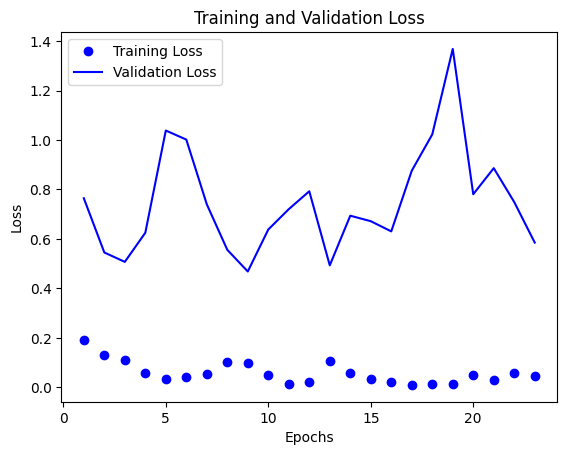

In [ ]:
import matplotlib.pyplot as plt

loss_value = trained_model_dict['categorical_crossentropy']
val_loss_value = trained_model_dict['val_categorical_crossentropy']

epochs = range(1,len(loss_value)+1)

plt.plot(epochs, loss_value, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_value, 'b', label= 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

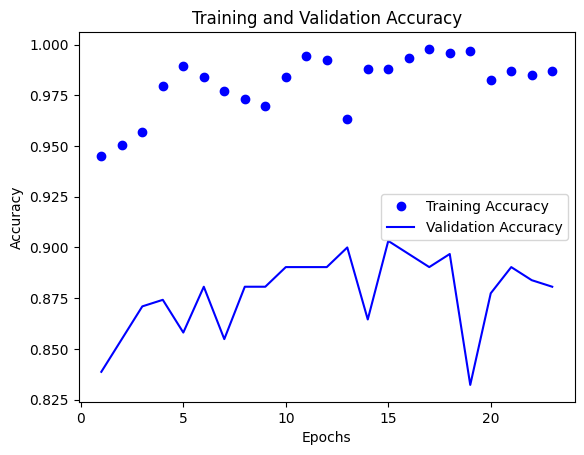

In [ ]:
acc_values = trained_model_dict['categorical_accuracy']
val_acc_values = trained_model_dict['val_categorical_accuracy']


plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label= 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print(f"Accuray of the model : {results[-1]}")

10/10 [==============================] - 2s 161ms/step - loss: 0.5831 - categorical_crossentropy: 0.5831 - categorical_accuracy: 0.8770
Accuray of the model : 0.8770226240158081
